발생일에 따른 지역별 건수와 기후별 특성 파악하기

In [83]:
import weatherAPI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#지역 날씨 예시로 보기(발생일, 발생일, 지역코드)
weatherAPI.load2('20210224','20210224','114')

,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,원주,20210224,2.7,0.0,0.6,33.9


In [3]:
#지역, 발생 데이터 불러오기
file_path = 'data_csv/HPAIOccurlist_final.csv'
hpai = pd.read_csv(file_path)
hpai.head()

,주소,축종,사육\r\n두수,진단일,발생일,지역코드
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101


In [4]:
#사육두수 글씨 제대로 고치기
hpai=hpai.rename(columns={'사육\r\n두수':'사육두수'})

In [5]:
#확인
hpai.head()

,주소,축종,사육두수,진단일,발생일,지역코드
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101


In [6]:
#데이터 확인
hpai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   축종      1122 non-null   object
 2   사육두수    1122 non-null   int64 
 3   진단일     1122 non-null   int64 
 4   발생일     1122 non-null   int64 
 5   지역코드    1122 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 52.7+ KB


In [7]:
#int64인거 고치기
hpai['사육두수']=hpai['사육두수'].astype('str')
hpai['진단일']=hpai['진단일'].astype('str')
hpai['발생일']=hpai['발생일'].astype('str')
hpai['지역코드']=hpai['지역코드'].astype('str')

In [8]:
#확인
hpai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   축종      1122 non-null   object
 2   사육두수    1122 non-null   object
 3   진단일     1122 non-null   object
 4   발생일     1122 non-null   object
 5   지역코드    1122 non-null   object
dtypes: object(6)
memory usage: 52.7+ KB


In [9]:
#위에 데이터랑 날씨 데이터 합치기
weather_list=['location','date','avg_temperature(C)','daily_rain(mm)','avg_wind(m/s)','avg_r_humidity(%)']
for name in weather_list:
     hpai[name]=np.nan
for i in range(len(hpai)):
    start=hpai.loc[i,'발생일']
    w_data=weatherAPI.load2(start, start, hpai.loc[i,'지역코드'])
    try:
        for col in weather_list:
            hpai.loc[i,col]=w_data.loc[0,col]
    except:
        print('error index:', i)

API error
error index: 581
API error
error index: 696


In [10]:
#확인
hpai.head()

,주소,축종,사육두수,진단일,발생일,지역코드,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114,원주,20210223,1.9,0.0,1.4,28.0
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211,인제,20170103,1.2,0.0,2.2,60.1
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95,철원,20161209,-0.1,1.7,1.6,68.9
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95,철원,20161130,3.2,1.2,0.9,72.1
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1


In [11]:
#지역코드별로 정렬하기
hpai_sort=hpai.sort_values('지역코드')
hpai_sort.head()

,주소,축종,사육두수,진단일,발생일,지역코드,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210112,20210111,108,서울,20210111,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,20080511,108,서울,20080511,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,20080511,108,서울,20080511,16.0,0.0,2.8,42.4


In [12]:
hpai_sort.to_csv("지역별 날씨.csv", encoding='utf-8-sig', index=False)

In [13]:
#필요없는 열 삭제
hpai1=hpai_sort.drop(['진단일','date'], axis=1)
hpai1.head()

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,108,서울,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4


In [14]:
hpai1.to_csv("지역별 날씨_최종.csv", encoding='utf-8-sig', index=False)

In [15]:
#지역코드별 발생숫자 내림차순 확인
hpai1['지역코드'].value_counts()

127    143
203    136
232    132
260     81
156     70
131     54
98      52
245     51
146     40
140     36
251     33
119     31
243     24
133     22
174     19
165     18
236     14
162     11
259     11
112     10
252      9
152      9
159      8
244      7
184      7
261      6
281      6
254      6
108      5
258      5
192      5
129      5
283      5
99       5
138      5
143      4
257      4
288      4
177      3
114      3
262      3
95       2
235      2
101      2
279      2
188      1
164      1
239      1
168      1
284      1
202      1
211      1
268      1
272      1
273      1
248      1
137      1
Name: 지역코드, dtype: int64

In [16]:
#지역명별 발생숫자 내림차순 확인
hpai1['location'].value_counts()

충주     143
이천     136
천안     132
장흥      81
광주      70
청주      54
동두천     52
정읍      51
전주      40
군산      36
고창군     33
수원      31
부안      24
대전      22
순천      19
목포      18
부여      14
강진군     11
통영      11
인천      10
영광군      9
울산       9
부산       8
임실       7
제주       7
해남       6
영천       6
경주시      5
서산       5
진주       5
순창군      5
파주       5
포항       5
보성군      5
서울       5
밀양       4
양산시      4
대구       4
원주       3
고흥       3
홍성       3
보령       2
춘천       2
철원       2
구미       2
상주       1
거창       1
여수       1
양평       1
세종       1
인제       1
성산       1
문경       1
장수       1
영주       1
진도군      1
Name: location, dtype: int64

In [319]:
from matplotlib import font_manager, rc

font_list = font_manager.findSystemFonts(fontpaths= None, fontext = 'ttc')
print(font_list[:])

['C:\\Windows\\Fonts\\timesi.ttf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream7.otf', 'C:\\Windows\\Fonts\\mmrtextb.ttf', 'C:\\Windows\\Fonts\\FREESCPT.TTF', 'C:\\Windows\\Fonts\\TCBI____.TTF', 'C:\\Windows\\Fonts\\Candaraz.ttf', 'C:\\Windows\\Fonts\\GIGI.TTF', 'C:\\Windows\\Fonts\\BOD_R.TTF', 'C:\\Windows\\Fonts\\LBRITEI.TTF', 'C:\\Windows\\Fonts\\TCCM____.TTF', 'C:\\Windows\\Fonts\\DUBAI-MEDIUM.TTF', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream8.otf', 'C:\\Windows\\Fonts\\MATURASC.TTF', 'C:\\Windows\\Fonts\\javatext.ttf', 'C:\\Windows\\Fonts\\LTYPEB.TTF', 'C:\\Windows\\Fonts\\FRAHVIT.TTF', 'C:\\Windows\\Fonts\\LFAX.TTF', 'C:\\Windows\\Fonts\\phagspab.ttf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareEB.ttf', 'C:\\Windows\\Fonts\\calibrib.ttf', 'C:\\Windows\\Fonts\\BOD_B.TTF', 'C:\\Windows\\Fonts\\framdit.ttf', 'C:\\Windows\\Fonts\\SitkaB.ttc', 'C:\\Windows\\Fonts\\NIAGENG.TTF', 'C:\\Windows\\Fonts\\ALGER.TTF

C:\Users\user\.conda\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, '춘천'),
  Text(1, 0, '서울'),
  Text(2, 0, '인천'),
  Text(3, 0, '원주'),
  Text(4, 0, '수원'),
  Text(5, 0, '충주'),
  Text(6, 0, '서산'),
  Text(7, 0, '청주'),
  Text(8, 0, '대전'),
  Text(9, 0, '상주'),
  Text(10, 0, '포항'),
  Text(11, 0, '군산'),
  Text(12, 0, '대구'),
  Text(13, 0, '전주'),
  Text(14, 0, '울산'),
  Text(15, 0, '광주'),
  Text(16, 0, '부산'),
  Text(17, 0, '통영'),
  Text(18, 0, '목포'),
  Text(19, 0, '여수'),
  Text(20, 0, '순천'),
  Text(21, 0, '홍성'),
  Text(22, 0, '제주'),
  Text(23, 0, '성산'),
  Text(24, 0, '진주'),
  Text(25, 0, '양평'),
  Text(26, 0, '이천'),
  Text(27, 0, '인제'),
  Text(28, 0, '천안'),
  Text(29, 0, '보령'),
  Text(30, 0, '부여'),
  Text(31, 0, '세종'),
  Text(32, 0, '부안'),
  Text(33, 0, '임실'),
  Text(34, 0, '정읍'),
  Text(35, 0, '장수

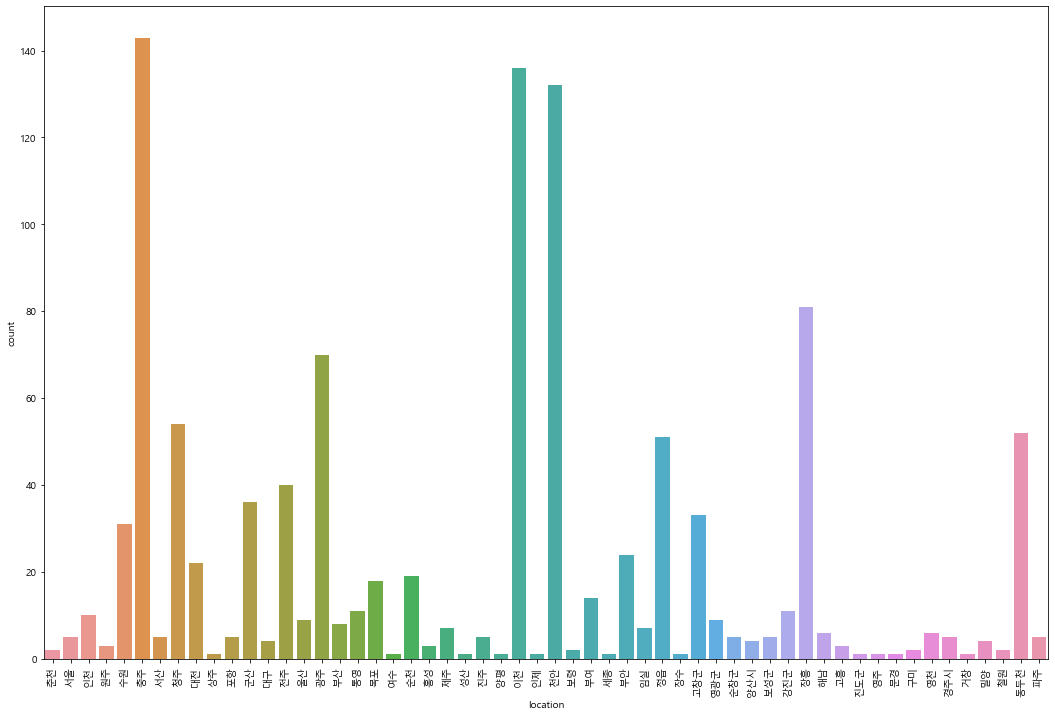

In [350]:
#지역별 발생숫자 시각화
f, ax = plt.subplots(1, figsize=(18,12))

fontname = 'C:\\WINDOWS\\Fonts\\segoeuib.ttf'
fontname = font_manager.FontProperties(fname=fontname).get_name()

sns.countplot(hpai1.location)
plt.xticks(rotation=90)

In [19]:
hpai_list={}
for n1, group in hpai1.groupby('location'):
    group=group.sort_values('발생일') # 발생일순 정렬
    group.reset_index(drop=True, inplace=True)
    hpai_list[n1]=group

In [20]:
hpai_list.keys()

dict_keys(['강진군', '거창', '경주시', '고창군', '고흥', '광주', '구미', '군산', '대구', '대전', '동두천', '목포', '문경', '밀양', '보령', '보성군', '부산', '부안', '부여', '상주', '서산', '서울', '성산', '세종', '수원', '순창군', '순천', '양산시', '양평', '여수', '영광군', '영주', '영천', '울산', '원주', '이천', '인제', '인천', '임실', '장수', '장흥', '전주', '정읍', '제주', '진도군', '진주', '천안', '철원', '청주', '춘천', '충주', '통영', '파주', '포항', '해남', '홍성'])

In [21]:
hpai_list['강진군']

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,전라남도 강진군 성전면 금당리,오리-육용오리,1,20140504,259,강진군,12.9,0.4,2.6,66.9
1,전라남도 강진군 성전면 금당리,오리-종오리,15000,20150428,259,강진군,16.4,46.0,3.1,87.9
2,전라남도 강진군 칠량면 삼흥리,오리-육용오리,6850,20150914,259,강진군,18.9,0.0,1.7,71.8
3,전라남도 강진군 강진읍 덕남리,닭-기타,60,20150921,259,강진군,20.8,0.0,1.6,83.1
4,전라남도 강진군 신전면 송천리,오리-육용오리,8800,20170226,259,강진군,3.7,0.0,2.0,64.0
5,전라남도 강진군 도암면 석문리,오리-육용오리,22400,20170305,259,강진군,7.0,0.0,1.9,62.9
6,전라남도 강진군 도암면 석문리,오리-종오리,8000,20170306,259,강진군,3.4,0.0,5.0,46.0
7,전라남도 강진군 도암면 석문리,오리-육용오리,40000,20170306,259,강진군,3.4,0.0,5.0,46.0
8,전라남도 강진군 성전면 금당리,오리-종오리,16800,20170309,259,강진군,6.8,0.0,3.8,49.5
9,전라남도 강진군 작천면 갈동리,오리-종오리,22000,20180104,259,강진군,0.3,0.0,3.0,55.5


In [22]:
hpai_list

{'강진군':                   주소       축종   사육두수       발생일 지역코드 location  \
 0   전라남도 강진군 성전면 금당리  오리-육용오리      1  20140504  259      강진군   
 1   전라남도 강진군 성전면 금당리   오리-종오리  15000  20150428  259      강진군   
 2   전라남도 강진군 칠량면 삼흥리  오리-육용오리   6850  20150914  259      강진군   
 3   전라남도 강진군 강진읍 덕남리     닭-기타     60  20150921  259      강진군   
 4   전라남도 강진군 신전면 송천리  오리-육용오리   8800  20170226  259      강진군   
 5   전라남도 강진군 도암면 석문리  오리-육용오리  22400  20170305  259      강진군   
 6   전라남도 강진군 도암면 석문리   오리-종오리   8000  20170306  259      강진군   
 7   전라남도 강진군 도암면 석문리  오리-육용오리  40000  20170306  259      강진군   
 8   전라남도 강진군 성전면 금당리   오리-종오리  16800  20170309  259      강진군   
 9   전라남도 강진군 작천면 갈동리   오리-종오리  22000  20180104  259      강진군   
 10  전라남도 강진군 성전면 금당리   오리-종오리   5900  20180110  259      강진군   
 
     avg_temperature(C)  daily_rain(mm)  avg_wind(m/s)  avg_r_humidity(%)  
 0                 12.9             0.4            2.6               66.9  
 1                 16.4            46.0            3.1     

In [23]:
hpai1.head()

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,108,서울,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4


In [24]:
#hpai1 지역별로 그룹바이하기
hphp=hpai1.groupby('location')
print(hphp)

In [25]:
#확인
hphp.groups

{'강진군': [372, 366, 367, 371, 369, 370, 368, 376, 375, 374, 373], '거창': [269], '경주시': [304, 296, 297, 302, 303], '고창군': [591, 590, 592, 614, 594, 593, 608, 609, 610, 611, 612, 613, 615, 616, 617, 618, 619, 620, 621, 622, 606, 605, 607, 603, 595, 596, 597, 604, 599, 600, 601, 598, 602], '고흥': [379, 378, 377], '광주': [430, 431, 432, 433, 434, 435, 436, 437, 429, 405, 427, 426, 425, 424, 423, 422, 421, 420, 419, 428, 438, 451, 440, 461, 460, 459, 458, 457, 456, 455, 454, 453, 452, 418, 450, 449, 448, 447, 464, 445, 444, 443, 442, 441, 439, 417, 402, 415, 316, 315, 416, 558, 557, 398, 399, 400, 401, 462, 463, 404, 413, 403, 414, 412, 410, 411, 409, 408, 407, 406], '구미': [305, 308], '군산': [703, 699, 700, 701, 702, 704, 716, 706, 627, 628, 629, 705, 626, 625, 624, 713, 714, 630, 715, 717, 719, 718, 721, 807, 707, 708, 709, 710, 720, 711, 809, 623, 712, 723, 722, 808], '대구': [319, 317, 318, 320], '대전': [347, 354, 348, 338, 349, 346, 351, 352, 353, 350, 345, 339, 343, 342, 341, 340, 334, 929, 33

In [26]:
#지역별 평균 날씨
hhh=hphp.mean()
print(hhh)
print(hpai1)

          avg_temperature(C)  daily_rain(mm)  avg_wind(m/s)  avg_r_humidity(%)
location                                                                      
강진군                 8.390909        4.900000       3.072727          64.972727
거창                 -9.000000        0.000000       1.700000          57.800000
경주시                 1.900000        4.800000       3.400000          48.160000
고창군                 2.300000        1.327273       1.860606          68.363636
고흥                  4.000000       21.166667       1.866667          70.133333
광주                  6.971429        1.701429       1.745714          64.267143
구미                 -2.300000        0.000000       1.800000          41.300000
군산                  8.391667        0.980556       3.044444          73.947222
대구                 24.375000        0.250000       1.650000          51.900000
대전                  3.959091        3.300000       1.100000          69.677273
동두천                 2.390385        0.428846       1

In [27]:
#지역 별 평균날씨 확인
hhh

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
location,,,,
강진군,8.390909,4.900000,3.072727,64.972727
거창,-9.000000,0.000000,1.700000,57.800000
경주시,1.900000,4.800000,3.400000,48.160000
고창군,2.300000,1.327273,1.860606,68.363636
고흥,4.000000,21.166667,1.866667,70.133333
광주,6.971429,1.701429,1.745714,64.267143
구미,-2.300000,0.000000,1.800000,41.300000
군산,8.391667,0.980556,3.044444,73.947222
대구,24.375000,0.250000,1.650000,51.900000


In [28]:
#지역별 발생건수 카운팅(내림차순)
hpai_count = hpai1['location'].value_counts()
hpai_count

충주     143
이천     136
천안     132
장흥      81
광주      70
청주      54
동두천     52
정읍      51
전주      40
군산      36
고창군     33
수원      31
부안      24
대전      22
순천      19
목포      18
부여      14
강진군     11
통영      11
인천      10
영광군      9
울산       9
부산       8
임실       7
제주       7
해남       6
영천       6
경주시      5
서산       5
진주       5
순창군      5
파주       5
포항       5
보성군      5
서울       5
밀양       4
양산시      4
대구       4
원주       3
고흥       3
홍성       3
보령       2
춘천       2
철원       2
구미       2
상주       1
거창       1
여수       1
양평       1
세종       1
인제       1
성산       1
문경       1
장수       1
영주       1
진도군      1
Name: location, dtype: int64

In [31]:
#데이터프레임화 (두개 합치려고)
hpai_count_df = pd.DataFrame(hpai_count)
hpai_count_df

,location
충주,143
이천,136
천안,132
장흥,81
광주,70
청주,54
동두천,52
정읍,51
전주,40
군산,36


In [32]:
#두개 합치긔
sum_df = [hhh, hpai_count_df]
HP = pd.concat(sum_df, axis=1)
HP.head()

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),location
강진군,8.390909,4.900000,3.072727,64.972727,11
거창,-9.000000,0.000000,1.700000,57.800000,1
경주시,1.900000,4.800000,3.400000,48.160000,5
고창군,2.300000,1.327273,1.860606,68.363636,33
고흥,4.000000,21.166667,1.866667,70.133333,3


In [33]:
#합친거 내림차순 정렬
HP = HP.sort_values(by='location', ascending = False)
HP.head()

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),location
충주,2.195105,0.579720,1.661538,60.930769,143
이천,1.138971,0.630882,1.258824,63.795588,136
천안,1.341667,1.368939,1.475758,67.770455,132
장흥,9.064198,7.133333,2.233333,71.367901,81
광주,6.971429,1.701429,1.745714,64.267143,70


In [298]:
HP.columns = ['평균 기온', '강수량', '평균 풍속', '평균 습도', '발생 건수']
HP.head()

,평균 기온,강수량,평균 풍속,평균 습도,발생 건수
충주,2.195105,0.579720,1.661538,60.930769,143
이천,1.138971,0.630882,1.258824,63.795588,136
천안,1.341667,1.368939,1.475758,67.770455,132
장흥,9.064198,7.133333,2.233333,71.367901,81
광주,6.971429,1.701429,1.745714,64.267143,70


In [279]:
HP.to_csv("발생건수별 평균기온.csv", encoding='utf-8-sig')

### 발생 지역별 발생 건수에 따른 기후별 특성 파악

결론 → 1.평균날씨와 발생건수는 크게 관련이 없는 것으로 보여짐 
        2.충청도, 전라도, 경기 외곽 지역이 타 지역보다 발생건수가 많은 것으로 확인

이유 → 계절별로 날씨가 다른데 전체 년도 평균으로 확인해서 특이점 찾기 어려움

해결 방안 → 1.발생수 많은 지역 특이점 찾기(농가 수, 철새 이동지 등 관련 데이터 확인) 
             2.계절별로 발생 수와 평균 날씨 분류 후 다시 확인해보기

## 계절별 발생 건수와 날씨 상관관계 분석

In [290]:
#hpai 발생 데이터 가져오기
hpai1

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,108,서울,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
...,...,...,...,...,...,...,...,...,...,...
8,경기도 고양시 덕양구 관산동,닭-토종닭,3000,20170303,99,파주,1.2,0.0,1.8,68.6
184,경기도 파주시 적성면 어유지리,닭-산란계,130000,20210126,99,파주,2.0,0.8,0.9,90.5
183,경기도 파주시 법원읍 갈곡리,닭-일괄,1600,20170603,99,파주,19.0,0.0,1.5,48.0
182,경기도 파주시 광탄면 창만리,닭-산란계,7000,20110118,99,파주,-11.6,0.0,0.8,64.4


In [291]:
#필요없는 열 삭제
hpai1_dd=hpai1.drop(['주소','축종','사육두수','지역코드'], axis=1)
hpai1_dd.head()

,발생일,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,20080507,춘천,13.2,17.0,0.6,66.1
5,20080507,춘천,13.2,17.0,0.6,66.1
22,20210111,서울,-6.7,0.0,1.9,62.1
332,20080511,서울,16.0,0.0,2.8,42.4
331,20080511,서울,16.0,0.0,2.8,42.4


In [292]:
#특정 컬럼 데이터 타입 변환
hpai1_dd['발생일']=hpai1_dd['발생일'].astype('str')

In [293]:
hpai1_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 4 to 9
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   발생일                 1122 non-null   object 
 1   location            1120 non-null   object 
 2   avg_temperature(C)  1120 non-null   float64
 3   daily_rain(mm)      1120 non-null   float64
 4   avg_wind(m/s)       1120 non-null   float64
 5   avg_r_humidity(%)   1120 non-null   float64
dtypes: float64(4), object(2)
memory usage: 101.4+ KB


In [294]:
#계절별로 구분하기 위해 컬럼 생성
hpai1_dd['season']=np.nan

In [295]:
hpai1_dd.head()

,발생일,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),season
4,20080507,춘천,13.2,17.0,0.6,66.1,NaN
5,20080507,춘천,13.2,17.0,0.6,66.1,NaN
22,20210111,서울,-6.7,0.0,1.9,62.1,NaN
332,20080511,서울,16.0,0.0,2.8,42.4,NaN
331,20080511,서울,16.0,0.0,2.8,42.4,NaN


In [296]:
# 사계절 분리
for i in range(len(hpai1_dd)):
    date=datetime.datetime.strptime(hpai1_dd.loc[i,'발생일'], '%Y%m%d')
    month=date.month
    if month>=3 and month<=5:
        hpai1_dd.loc[i,'season']=1
    elif month>=6 and month<=8:
        hpai1_dd.loc[i,'season']=2
    elif month>=9 and month<=11:
        hpai1_dd.loc[i,'season']=3
    else:
        hpai1_dd.loc[i,'season']=4

In [297]:
hpai1_dd.head()

,발생일,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),season
4,20080507,춘천,13.2,17.0,0.6,66.1,1.0
5,20080507,춘천,13.2,17.0,0.6,66.1,1.0
22,20210111,서울,-6.7,0.0,1.9,62.1,4.0
332,20080511,서울,16.0,0.0,2.8,42.4,1.0
331,20080511,서울,16.0,0.0,2.8,42.4,1.0


In [74]:
#계절별 발생건수 카운팅(내림차순)
hpai1_dd_count = hpai1_dd['season'].value_counts()
hpai1_dd_count

4.0    734
1.0    216
3.0    124
2.0     48
Name: season, dtype: int64

In [75]:
#데이터프레임화
hpai1_ddd_count = pd.DataFrame(hpai1_dd_count)
hpai1_ddd_count

,season
4.0,734
1.0,216
3.0,124
2.0,48


In [68]:
#hpai1 계절별로 그룹바이하기
hpai1_ddd=hpai1_dd.groupby('season')
print(hpai1_ddd)

In [72]:
hpai1_dddd=hpai1_ddd.mean()
print(hpai1_dddd)

        avg_temperature(C)  daily_rain(mm)  avg_wind(m/s)  avg_r_humidity(%)
season                                                                      
1.0               9.065888        1.863084       2.150467          59.760280
2.0              20.612500        1.618750       2.568750          71.956250
3.0               9.458871        4.869355       1.385484          69.560484
4.0               1.085286        0.925749       1.696594          64.862125


In [81]:
#데이터 프레임 화
hpai1_dddd = pd.DataFrame(hpai1_dddd)
hpai1_dddd

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
season,,,,
1.0,9.065888,1.863084,2.150467,59.760280
2.0,20.612500,1.618750,2.568750,71.956250
3.0,9.458871,4.869355,1.385484,69.560484
4.0,1.085286,0.925749,1.696594,64.862125


In [82]:
#두개 합치긔
sum_hpai1_df = [hpai1_ddd_count, hpai1_dddd]
sum_HPHP = pd.concat(sum_hpai1_df, axis=1)
sum_HPHP.head()

,season,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
1.0,216,9.065888,1.863084,2.150467,59.760280
2.0,48,20.612500,1.618750,2.568750,71.956250
3.0,124,9.458871,4.869355,1.385484,69.560484
4.0,734,1.085286,0.925749,1.696594,64.862125


### 계절별 발생 건수와 날씨 상관관계 분석

##### 결론 → 1.계절별 발생 건수는 4계절 중 겨울이 월등하게 많음
        ##### 2.날씨 별 특이점은 찾기 어려움

##### 이유 → 겨울이 가장 많이 발생했는데 온도, 강수량, 풍속, 습도등 전부 특이사항 없음

##### 해결 방안 → 1.계절별 발생 건수와 날씨 상관관계 외에 다른 가설 세워보기
             ##### 2.세밀하게 분류 한 후 다시 확인해보기

## 지역별 발생 건수와 지역별 철새 개체수 분포 비교

In [106]:
#hpai발생 데이터 불러오기
hpai1

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,108,서울,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
...,...,...,...,...,...,...,...,...,...,...
8,경기도 고양시 덕양구 관산동,닭-토종닭,3000,20170303,99,파주,1.2,0.0,1.8,68.6
184,경기도 파주시 적성면 어유지리,닭-산란계,130000,20210126,99,파주,2.0,0.8,0.9,90.5
183,경기도 파주시 법원읍 갈곡리,닭-일괄,1600,20170603,99,파주,19.0,0.0,1.5,48.0
182,경기도 파주시 광탄면 창만리,닭-산란계,7000,20110118,99,파주,-11.6,0.0,0.8,64.4


In [114]:
#필요없는 열 삭제
hpai1_11=hpai1.drop(['location','지역코드'], axis=1)
hpai1_11.head()

,주소,축종,사육두수,발생일,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,16.0,0.0,2.8,42.4


In [115]:
hpai1_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 4 to 9
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   주소                  1122 non-null   object 
 1   축종                  1122 non-null   object 
 2   사육두수                1122 non-null   object 
 3   발생일                 1122 non-null   object 
 4   avg_temperature(C)  1120 non-null   float64
 5   daily_rain(mm)      1120 non-null   float64
 6   avg_wind(m/s)       1120 non-null   float64
 7   avg_r_humidity(%)   1120 non-null   float64
dtypes: float64(4), object(4)
memory usage: 118.9+ KB


In [116]:
#지역별로 분류하기 위해 컬럼 생성
hpai1_11['광역시']=np.nan

In [285]:
hpai1_11.head()

,주소,축종,사육두수,발생일,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),광역시
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,13.2,17.0,0.6,66.1,강원도
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,13.2,17.0,0.6,66.1,강원도
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,-6.7,0.0,1.9,62.1,경기도
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,16.0,0.0,2.8,42.4,서울특별시
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,16.0,0.0,2.8,42.4,서울특별시


In [118]:
# 시군구 단위 지역 분류
for i in range(len(hpai1_11)):
    temp=hpai1_11.loc[i,'주소'].split()
    hpai1_11.loc[i,'광역시']=temp[0] # 시도

In [284]:
hpai1_11.head()

,주소,축종,사육두수,발생일,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),광역시
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,13.2,17.0,0.6,66.1,강원도
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,13.2,17.0,0.6,66.1,강원도
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,-6.7,0.0,1.9,62.1,경기도
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,16.0,0.0,2.8,42.4,서울특별시
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,16.0,0.0,2.8,42.4,서울특별시


In [120]:
#hpai1_11 지역별로 그룹바이하기
hphp_11=hpai1_11.groupby('광역시')
print(hphp_11)

In [121]:
#지역별 발생건수 카운팅(내림차순)
hpai_11_count = hpai1_11['광역시'].value_counts()
hpai_11_count

경기도        261
전라남도       224
충청북도       198
전라북도       195
충청남도       132
경상남도        25
세종특별자치시     22
경상북도        21
울산광역시        9
부산광역시        8
강원도          8
제주특별자치도      7
대구광역시        4
서울특별시        4
인천광역시        2
광주광역시        2
Name: 광역시, dtype: int64

In [259]:
#데이터프레임화
hpai_11_count_df = pd.DataFrame(hpai_11_count)
hpai_11_count_df

,광역시
경기도,261
전라남도,224
충청북도,198
전라북도,195
충청남도,132
경상남도,25
세종특별자치시,22
경상북도,21
울산광역시,9
부산광역시,8


In [201]:
#지역별 철새 분포 개체수 데이터 불러오기
file_path_2 = '분포통계(지역별)_20210802.csv'
hpai_2 = pd.read_csv(file_path_2)
hpai_2.head()

,구분,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,강원도,6039,3037,3306,2977,12994,4025,17521,5176,5759,...,5602,4177,5489,10857,17208,29915,39898,56868,62302,21929
1,경기도,0,0,0,0,0,14809,13017,13534,15252,...,12164,11580,9458,3530,9172,5690,3060,5691,7786,4452
2,서울특별시,0,0,0,0,0,0,0,6230,3540,...,6822,7727,8706,6333,2527,876,2208,1647,2925,1979
3,서울특별시,16661,7173,9452,18340,4245,15486,9803,10422,7948,...,2190,2051,1655,3023,5880,2468,3588,2084,2368,2602
4,서울특별시,3052,5825,4624,8222,3927,2841,4545,6624,2454,...,4169,3249,3464,0,5514,1194,1556,1885,1521,2537


In [203]:
hpai_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      230 non-null    object
 1   2000년   230 non-null    int64 
 2   2001년   230 non-null    int64 
 3   2002년   230 non-null    int64 
 4   2003년   230 non-null    int64 
 5   2004년   230 non-null    int64 
 6   2005년   230 non-null    int64 
 7   2006년   230 non-null    int64 
 8   2007년   230 non-null    int64 
 9   2008년   230 non-null    int64 
 10  2009년   230 non-null    int64 
 11  2010년   230 non-null    int64 
 12  2011년   230 non-null    int64 
 13  2012년   230 non-null    int64 
 14  2013년   230 non-null    int64 
 15  2014년   230 non-null    int64 
 16  2015년   230 non-null    int64 
 17  2016년   230 non-null    int64 
 18  2017년   230 non-null    int64 
 19  2018년   230 non-null    int64 
 20  2019년   230 non-null    int64 
 21  2020년   230 non-null    int64 
 22  2021년   230 non-null    in

In [204]:
#지역별로 정렬하기
hpai_2_sort=hpai_2.sort_values('구분')
hpai_2_sort.head()

,구분,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,강원도,6039,3037,3306,2977,12994,4025,17521,5176,5759,...,5602,4177,5489,10857,17208,29915,39898,56868,62302,21929
179,강원도,1873,1437,2062,577,2930,572,394,3607,5982,...,5037,5699,9805,1840,5227,8704,11847,7056,3983,6289
180,강원도,125,2238,1855,1370,1027,3587,3767,804,4827,...,2650,5464,2669,0,2743,7147,3782,6392,4814,4538
181,강원도,2603,831,2634,4158,2022,838,615,1615,2582,...,1084,673,2879,2497,2067,1775,726,3777,1166,1133
182,강원도,0,0,0,0,0,0,1377,2959,3638,...,2498,1765,1473,1063,2282,1716,888,1232,1701,1735


In [218]:
#지역을 기준으로 개체수 합산
hpai_2_group = hpai_2_sort.groupby('구분').sum()

In [283]:
hpai_2_group.head()

,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,...,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,합계,평균
구분,,,,,,,,,,,,,,,,,,,,,
강원도,30614,35998,17181,17918,32987,14467,39546,25521,36770,79172,...,64977,24594,82518,105217,97247,125132,110456,71303,1172184.0,101929.043478
경기도,191156,199359,74885,55923,114055,130975,149314,134945,130155,101569,...,120048,94281,170668,134876,142928,150650,195500,158879,2972900.0,258513.043478
경상남도,17540,23776,27609,20787,24392,24033,31049,32237,54019,32228,...,44842,15721,44074,46232,69441,50843,59362,59177,884039.0,76872.956522
경상북도,5684,14136,29293,17533,18791,28766,47551,28348,54569,40194,...,39810,15788,38207,46879,38990,49168,39057,42594,758399.0,65947.739130
광주광역시,0,0,0,0,0,0,0,0,0,0,...,6043,1303,5716,4005,11741,6713,3728,4323,48422.0,4210.608696


In [210]:
#파일 저장
hpai_2_group.to_csv("지역별 철새 분포.csv", encoding='utf-8-sig', index=False)

In [248]:
#지역별 개체수 합계,평균 구하기 위해 컬럼 생성
hpai_2_group['합계']=np.nan
hpai_2_group['평균']=np.nan

In [282]:
hpai_2_group.head()

,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,...,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,합계,평균
구분,,,,,,,,,,,,,,,,,,,,,
강원도,30614,35998,17181,17918,32987,14467,39546,25521,36770,79172,...,64977,24594,82518,105217,97247,125132,110456,71303,1172184.0,101929.043478
경기도,191156,199359,74885,55923,114055,130975,149314,134945,130155,101569,...,120048,94281,170668,134876,142928,150650,195500,158879,2972900.0,258513.043478
경상남도,17540,23776,27609,20787,24392,24033,31049,32237,54019,32228,...,44842,15721,44074,46232,69441,50843,59362,59177,884039.0,76872.956522
경상북도,5684,14136,29293,17533,18791,28766,47551,28348,54569,40194,...,39810,15788,38207,46879,38990,49168,39057,42594,758399.0,65947.739130
광주광역시,0,0,0,0,0,0,0,0,0,0,...,6043,1303,5716,4005,11741,6713,3728,4323,48422.0,4210.608696


In [250]:
#합계, 평균 구하기
hpai_2_group['합계'] = hpai_2_group.sum(axis=1)
hpai_2_group['평균'] = hpai_2_group.mean(axis=1)

In [281]:
hpai_2_group.head()

,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,...,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,합계,평균
구분,,,,,,,,,,,,,,,,,,,,,
강원도,30614,35998,17181,17918,32987,14467,39546,25521,36770,79172,...,64977,24594,82518,105217,97247,125132,110456,71303,1172184.0,101929.043478
경기도,191156,199359,74885,55923,114055,130975,149314,134945,130155,101569,...,120048,94281,170668,134876,142928,150650,195500,158879,2972900.0,258513.043478
경상남도,17540,23776,27609,20787,24392,24033,31049,32237,54019,32228,...,44842,15721,44074,46232,69441,50843,59362,59177,884039.0,76872.956522
경상북도,5684,14136,29293,17533,18791,28766,47551,28348,54569,40194,...,39810,15788,38207,46879,38990,49168,39057,42594,758399.0,65947.739130
광주광역시,0,0,0,0,0,0,0,0,0,0,...,6043,1303,5716,4005,11741,6713,3728,4323,48422.0,4210.608696


In [252]:
#필요없는 행 삭제
hpai_2_group_drop = hpai_2_group.drop(hpai_2_group.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
hpai_2_group_drop

,합계,평균
구분,,
강원도,1172184.0,101929.043478
경기도,2972900.0,258513.043478
경상남도,884039.0,76872.956522
경상북도,758399.0,65947.739130
광주광역시,48422.0,4210.608696
대구광역시,371046.0,32264.869565
대전광역시,92159.0,8013.826087
부산광역시,1219012.0,106001.043478
서울특별시,814153.0,70795.913043


In [261]:
#합계, 평균 기준으로 내림차순 카운팅
hpai_2_group_drop_count = hpai_2_group_drop.sort_values(by='합계', ascending = False)
hpai_2_group_drop_count

,합계,평균
구분,,
충청남도,7998554.0,695526.434783
전라남도,4985224.0,433497.739130
전라북도,4315711.0,375279.217391
경기도,2972900.0,258513.043478
울산광역시,1430228.0,124367.652174
부산광역시,1219012.0,106001.043478
강원도,1172184.0,101929.043478
경상남도,884039.0,76872.956522
서울특별시,814153.0,70795.913043


In [247]:
#지역별 발생 건수와 비교
hpai_11_count_df

,광역시
경기도,261
전라남도,224
충청북도,198
전라북도,195
충청남도,132
경상남도,25
세종특별자치시,22
경상북도,21
울산광역시,9
부산광역시,8


In [301]:
hpai_11_count_df_in = hpai_11_count_df.reset_index()
hpai_11_count_df_in.columns = ['지역명', '발생건수']
hpai_11_count_df_in

,지역명,발생건수
0,경기도,261
1,전라남도,224
2,충청북도,198
3,전라북도,195
4,충청남도,132
5,경상남도,25
6,세종특별자치시,22
7,경상북도,21
8,울산광역시,9
9,부산광역시,8


In [305]:
hpai_2_group_drop_count_in = hpai_2_group_drop_count.reset_index()
hpai_2_group_drop_count_in.columns = ['지역명', '개체수(합계)','개체수(평균)']
hpai_2_group_drop_count_in

,지역명,개체수(합계),개체수(평균)
0,충청남도,7998554.0,695526.434783
1,전라남도,4985224.0,433497.739130
2,전라북도,4315711.0,375279.217391
3,경기도,2972900.0,258513.043478
4,울산광역시,1430228.0,124367.652174
5,부산광역시,1219012.0,106001.043478
6,강원도,1172184.0,101929.043478
7,경상남도,884039.0,76872.956522
8,서울특별시,814153.0,70795.913043
9,경상북도,758399.0,65947.739130


<AxesSubplot:xlabel='지역명'>

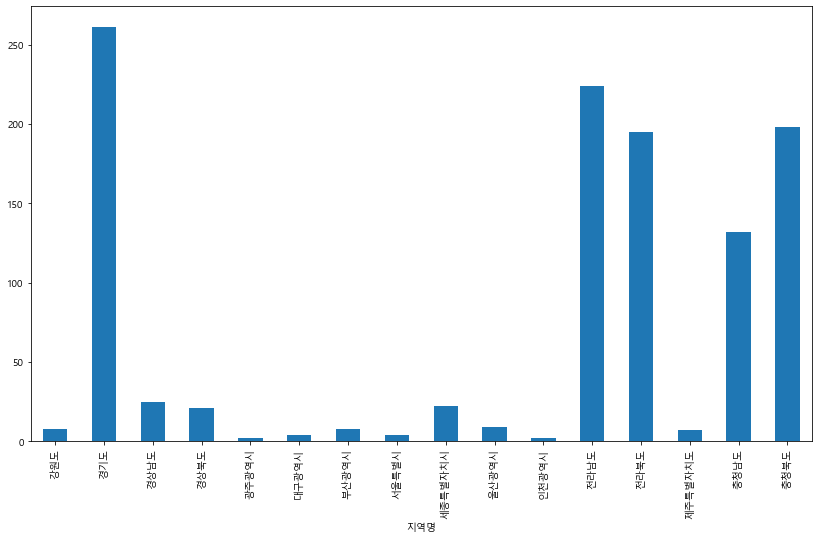

In [345]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
f, ax = plt.subplots(1, figsize=(14,8))
hpai_11_count_df_in.groupby('지역명')['발생건수'].mean().plot(kind='bar')

<AxesSubplot:xlabel='지역명'>

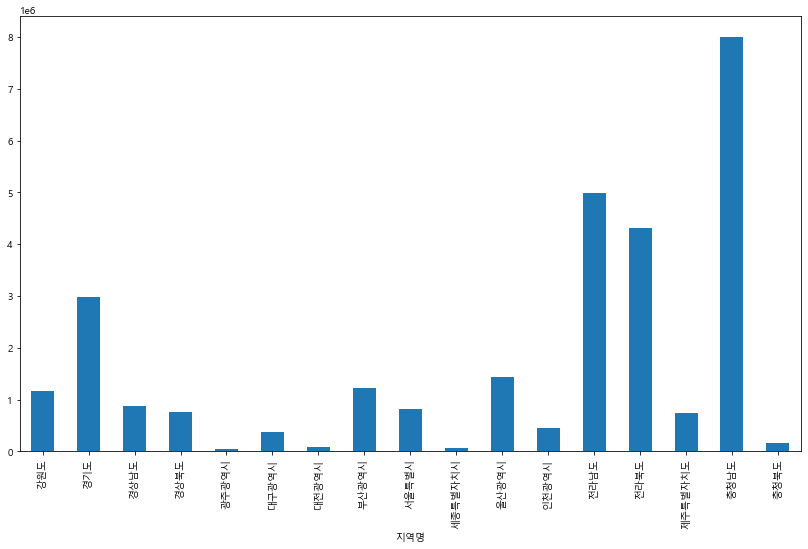

In [349]:
f, ax = plt.subplots(1, figsize=(14,8))
hpai_2_group_drop_count_in.groupby('지역명')['개체수(합계)'].mean().plot(kind='bar')

In [354]:
#f, ax = plt.subplots(1, figsize=(20,12))
#hpai_11_count_df_in.groupby('지역명')['발생건수'].mean().plot(kind='pie')

### 지역별 HPAI발생 건수와 지역별 철새 개체수 분포 비교(2000~2021년 기준)

#### 결론 → 1.지역별 발생 건수 순서(경기도, 전라남도, 충청북도, 전라북도, 충청남도)
####              2.지역별 철새 개체수 순서(충청남도, 전라남도, 전라북도, 경기도)
####              3.지역별 철새 개체수 중 충청북도 지역이 충남으로 설정된 곳 다수 인걸 감안하면
####                 지역별 철새 개체수와 지역별 HPAI 발생 건수는 밀접한 관련이 있는 것으로 보여짐

#### 이유 → 발생 건수가 많은 곳이 흡사함!

#### 해결 방안 → 1.지역별로 정확하게 분류 한 후 다시 확인해보기
####                      2.철새 이동지 등 고려할 수 있는 다른 방안 생각해보기

가정: 지역별 조류인플루엔자 발생과 지역별 철새 개체수는 관련이 있다.

귀무가설: 조류인플루엔자 발생건수가 많은 지역은 철새 개체수가 많다.

대립가설: 조류인플루엔자 발생건수가 많은 지역은 철새 개체수가 많지 않다.